In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para el preprocesado y escalado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Para la construcción del modelo de red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Para evaluar el rendimiento
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error

In [2]:
# -------------------------
# 1. Carga de datos
# -------------------------
df = pd.read_csv("true_car_listings.csv")
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [4]:
print("\nResumen estadístico:")
df.describe()


Resumen estadístico:


,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [5]:
# -------------------------
# 2. Limpieza de datos
# -------------------------
# Identificamos las columnas categóricas y numéricas
numerical_cols = ['Year', 'Mileage']
categorical_cols = ['City', 'State', 'Make', 'Model']
target = 'Price'
all_columns = ['Year', 'Mileage', 'City', 'State', 'Make', 'Model']

print("Número de nulos:") 
print(df.isnull().sum())
print()
print(df['City'].value_counts())
print()
print(df['State'].value_counts())
print()
print(df['Make'].value_counts())
print()
print(df['Model'].value_counts())
print()

df.drop(columns=['Vin'], inplace=True)
# Quitamos la columna Vin porque no aporta nada al modelo

Número de nulos:
Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

City
Houston         12703
San Antonio      8078
Louisville       5872
Jacksonville     5675
Austin           5297
                ...  
Los Banos           4
Pen Argyl           4
Armona              4
Port Jervis         4
Royston             2
Name: count, Length: 2553, dtype: int64

State
TX    94654
CA    80437
FL    72530
GA    39414
IL    38680
NC    37530
VA    35011
PA    28130
NY    27932
NJ    27852
OH    23259
WA    23149
CO    23004
AZ    22401
TN    19166
MA    17990
MD    17572
IN    16465
MO    16165
KY    13691
AL    13293
WI    11255
MN    10996
CT    10906
UT    10418
OR    10352
MI    10328
SC     9790
OK     9584
LA     8528
KS     7894
AR     6952
NV     6887
MS     6242
NH     5694
NE     4924
IA     4840
NM     4729
ID     3501
HI     2995
DE     2418
MT     1984
ME     1920
RI     1858
AK     1663
WV     1501
SD     1267
VT     

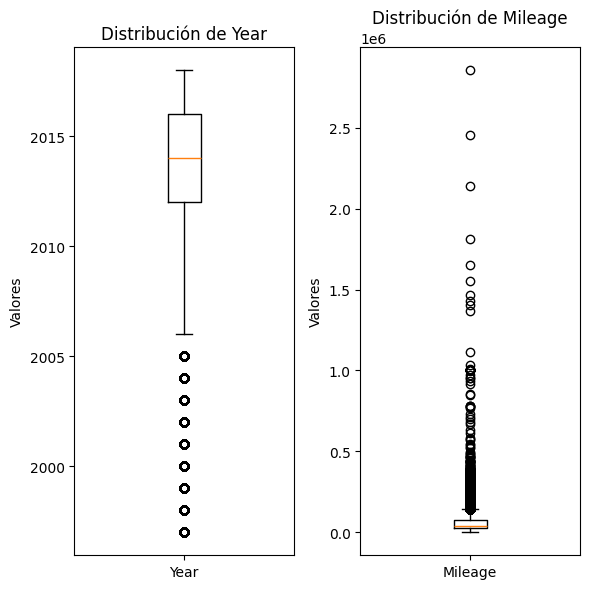

In [6]:
# -------------------------
# 2. Análisis visual de variables
# -------------------------
ig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
axes = axes.flatten() 

for i, var in enumerate(numerical_cols): 
    axes[i].boxplot(df[var], tick_labels=[var]) 
    axes[i].set_title(f'Distribución de {var}') 
    axes[i].set_ylabel('Valores')

for j in range(len(numerical_cols), len(axes)): 
    axes[j].axis('off')

plt.tight_layout() 
plt.show()

In [7]:
# -------------------------
# 2. Preprocesamiento e engeniería de Características
# -------------------------

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [8]:
df.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,646,49,1,1194
1,10888,2013,19606,1260,39,1,1193
2,8995,2013,48851,646,49,1,1194
3,10999,2014,39922,2490,6,1,1193
4,14799,2016,22142,1231,50,1,1196


In [9]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train[all_columns] = scaler.fit_transform(X_train[all_columns])
X_test[all_columns] = scaler.transform(X_test[all_columns])

In [11]:
# -------------------------
# 4. Creación y entrenamiento de la red neuronal
# -------------------------
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Dense(1, activation='linear')) 

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,569 (178.00 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Usamos EarlyStopping para evitar sobreajuste y entrenamos
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

Epoch 1/100
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 8822.4316 - mean_absolute_error: 8814.1592 - val_loss: 7196.8364 - val_mean_absolute_error: 7188.1558
Epoch 2/100
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 7832.8906 - mean_absolute_error: 7823.6704 - val_loss: 7123.4673 - val_mean_absolute_error: 7112.2100
Epoch 3/100
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 7653.4463 - mean_absolute_error: 7641.4741 - val_loss: 8073.4717 - val_mean_absolute_error: 8059.3555
Epoch 4/100
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 7627.0659 - mean_absolute_error: 7612.4233 - val_loss: 7537.0581 - val_mean_absolute_error: 7520.6562
Epoch 5/100
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 7544.5229 - mean_absolute_error: 7527.5293 - val_loss: 8146.1699 - val_mean_absolute_error: 8127.5430
Epoch 6/100
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 7529.2563 - mean_absolute_error: 7509.4917 - val_loss: 7910.7090 - val_mean_absolute_error: 78

5326/5326 ━━━━━━━━━━━━━━━━━━━━ 5s 923us/step


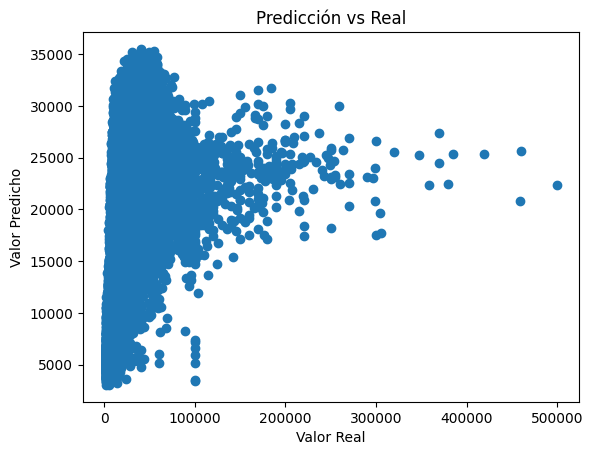

In [13]:
# -------------------------
# 5. Evaluación del modelo
# -------------------------
# Evaluamos en el conjunto de test
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Predicción vs Real')
plt.show()

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

# Calculamos R²
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 7087.4341468035445
MSE: 149380956.06444055
RMSE: 12222.150222626155
R²: 0.18751311302185059


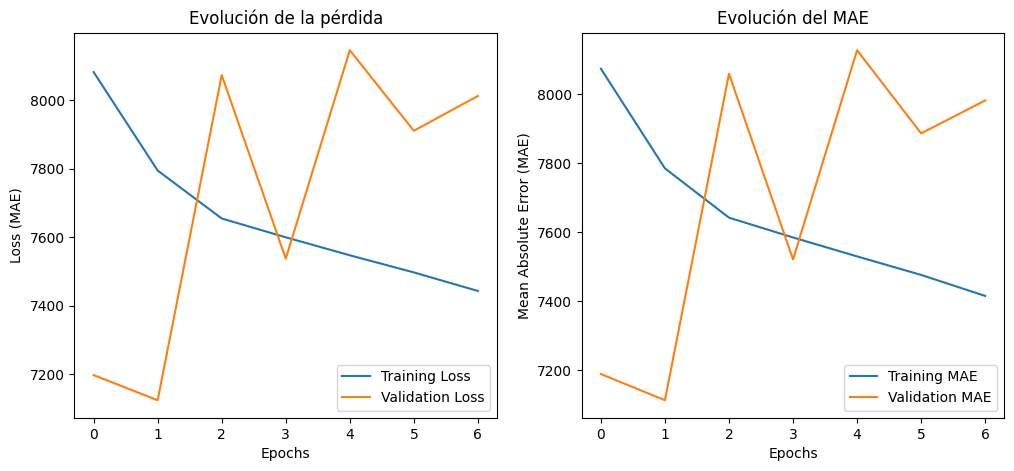

In [15]:
# -------------------------
# 6. Visualización del historial de entrenamiento
# -------------------------
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.title('Evolución de la pérdida')

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Evolución del MAE')

plt.show()

In [17]:
df.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,646,49,1,1194
1,10888,2013,19606,1260,39,1,1193
2,8995,2013,48851,646,49,1,1194
3,10999,2014,39922,2490,6,1,1193
4,14799,2016,22142,1231,50,1,1196


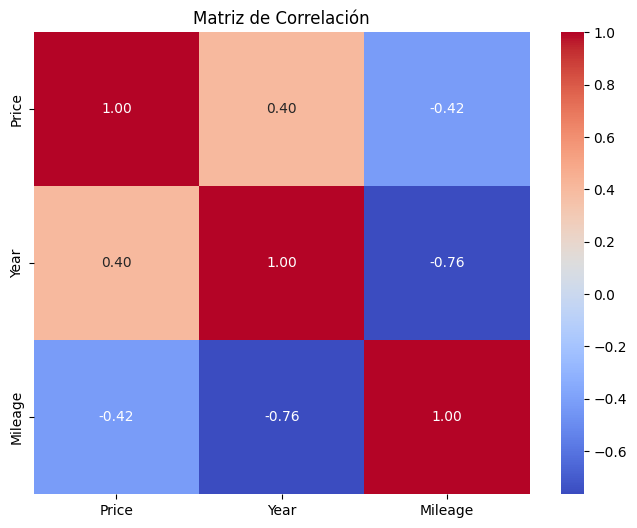

In [18]:
# -------------------------
# ANÁLISIS EXPLORATORIO DE DATOS
# -------------------------
numerical_correlation = ['Price', 'Year', 'Mileage']
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_correlation].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [33]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=input_dim))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu')) 
model.add(Dense(1, activation='linear')) 

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,569 (178.00 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Usamos EarlyStopping para evitar sobreajuste y entrenamos
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stop], verbose=1)

Epoch 1/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 9276.1416 - mean_absolute_error: 9276.1416 - val_loss: 7171.2671 - val_mean_absolute_error: 7171.2671
Epoch 2/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 7837.2021 - mean_absolute_error: 7837.2021 - val_loss: 7160.8379 - val_mean_absolute_error: 7160.8379
Epoch 3/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 7811.6079 - mean_absolute_error: 7811.6079 - val_loss: 7101.9614 - val_mean_absolute_error: 7101.9614
Epoch 4/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 7783.4771 - mean_absolute_error: 7783.4771 - val_loss: 7013.1553 - val_mean_absolute_error: 7013.1553
Epoch 5/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 7709.6631 - mean_absolute_error: 7709.6631 - val_loss: 6959.4614 - val_mean_absolute_error: 6959.4614
Epoch 6/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 7662.1899 - mean_absolute_error: 7662.1899 - val_loss: 6987.0615 - val_mean_absolute_error: 6987.0615
Epoc

In [36]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

# Calculamos R²
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

5326/5326 ━━━━━━━━━━━━━━━━━━━━ 5s 863us/step
MAE: 6212.413433680848
MSE: 136234196.99235898
RMSE: 11671.940583825766
R²: 0.2590187191963196


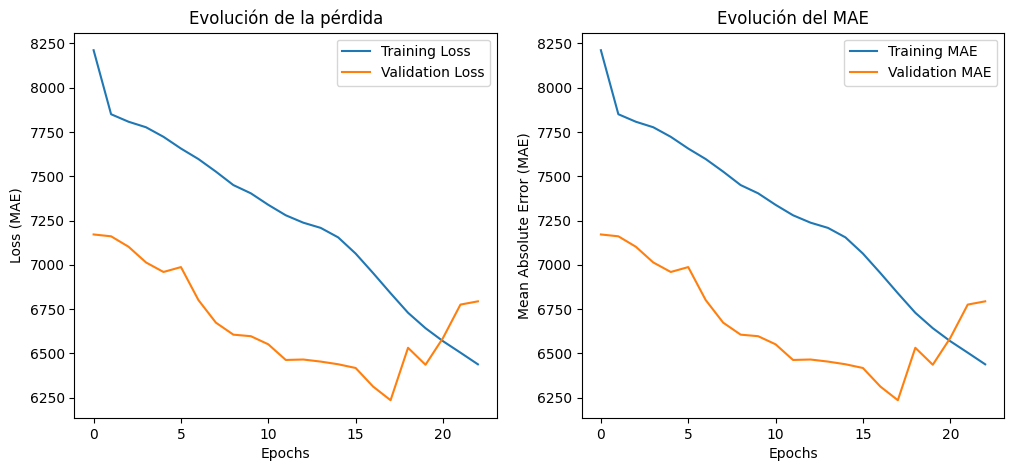

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.title('Evolución de la pérdida')

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Evolución del MAE')

plt.show()